# Importing Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data as dataframe

In [2]:
df_gender_submission = pd.read_csv('gender_submission.csv')
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.describe() #Describing train data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill in Missing Values

In [6]:
df_train['Age'] = df_train['Age'].dropna() #drop missing values on 'Age' Column to calculate the mean value

In [7]:
mean_age = df_train['Age'].mean() #define new variable 'mean_age' to fill the missing value in 'Age' column

In [8]:
df_train_no_missing_val = df_train.fillna(mean_age) #fill in the missing value, define new df
df_train_no_missing_val['Age'] = df_train_no_missing_val['Age'].astype(int)

In [9]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,29.699118,S


### Showing how many people survived based on sex

C:\Users\dell\AppData\Local\Temp\ipykernel_16812\2656363375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_16812\2656363375.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


<Axes: xlabel='Sex', ylabel='Survived'>

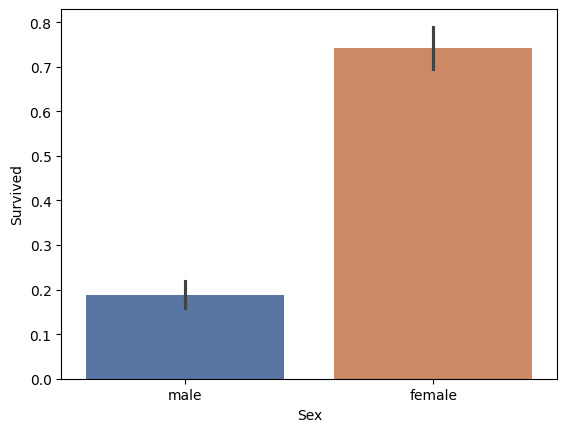

In [10]:
sns.barplot(
    data = df_train_no_missing_val,
    x = 'Sex',
    y = 'Survived',
    palette = sns.color_palette('deep')
)

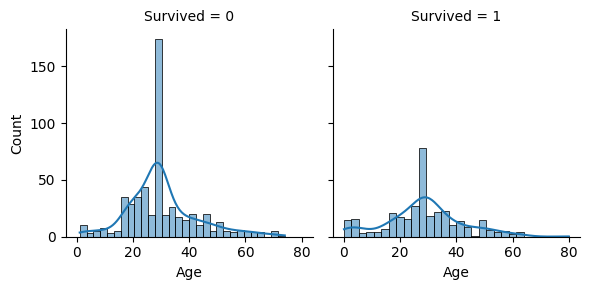

In [11]:
grid = sns.FacetGrid(
    data = df_train_no_missing_val,
    col = 'Survived',
)
grid.map(sns.histplot, 'Age', kde = True, bins = 30)

### Convert gender classification into numeric

In [12]:
gender2id = {'male': 0, 'female': 1} #define new dictionary 'gender2id' with value 0 and 1 which represent each gender
df_train_no_missing_val['Sex'] = df_train_no_missing_val['Sex'].map(gender2id) #mapping the dictionary
 

In [13]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,S


In [14]:
df_sex_survived_rate = df_train_no_missing_val[['Survived', 'Sex']].groupby('Sex', as_index=False).mean() #showing survival rate for each gender
df_sex_survived_rate

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [15]:
df_sex_survived_num = df_train_no_missing_val[['Survived', 'Sex']].groupby('Sex', as_index=False).sum() #showing the total numbers of survived for each gender
df_sex_survived_num

,Sex,Survived
0,0,109
1,1,233


In [16]:
#using round to get non-decimal value

print('Female Population:', round(233/0.742038))
print('Male Population:', round(109/0.188908))

Female Population: 314
Male Population: 577


### Count Embarked

In [17]:
#count embarked
count_embarked = {'S': 0, 'C': 0, 'Q':0} #define new dictionary for each embarked 'S', 'C', and 'Q'
for val in df_train_no_missing_val['Embarked']: #using loop function to count every embarked 'S', 'C', and 'Q'
    if val == 'S':
        count_embarked['S'] += 1
    elif val == 'C':
        count_embarked['C'] += 1
    elif val == 'Q':
        count_embarked['Q'] +=1
    else:
        pass

In [18]:
count_embarked

{'S': 644, 'C': 168, 'Q': 77}

In [19]:
df_train_no_missing_val['Embarked'] = df_train_no_missing_val['Embarked'].fillna('S') #fill in the missing value with most embarked value (mode). Most embarked value = S, total counted = 644

In [20]:
embarked2id = {'S': 0, 'C': 1, 'Q':2} #define new dictionary 'embarked2id' with value 0, 1, and 2 which represent each embarked value

for data in [df_train_no_missing_val, df_test]:
    data['Embarked'] = data['Embarked'].map(embarked2id)

In [21]:
df_train_no_missing_val['Embarked'] = df_train_no_missing_val['Embarked'].fillna('0')

In [22]:
df_train_no_missing_val['Embarked'] = df_train_no_missing_val['Embarked'].astype(int)
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,0


## Drop unnecessary columns ('Ticket', 'Fare', 'Cabin')

In [23]:
for data in [df_train_no_missing_val, df_test]:
    data.drop(['Ticket', 'Fare','Cabin'], axis=1, inplace=True)

In [24]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0


### Engineer 'Name' Column to be a feature information

In [25]:
df_train_no_missing_val.Name.str.extract(" ([A-Za-z]+)\.", expand=False) #using str.extract from 'Name' column to get the title of each passenger

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

### Add new column named 'Title'

In [26]:
for dataset in [df_train_no_missing_val, df_test]:
    dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)

In [27]:
df_train_no_missing_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,1,Mr


In [28]:
pd.crosstab(df_train_no_missing_val['Title'], df_train_no_missing_val['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


## Classify the title

In [29]:
for dataset in [df_train_no_missing_val, df_test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare') #the odd title classified as 'Rare'
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') #replace 'Mlle', 'Ms', and 'Mme'to 'Miss'
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

In [30]:
df_train_no_missing_val[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() #showing survival rate of each title

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [31]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0,Mr


### Drop 'Name' column

In [32]:
for data in [df_train_no_missing_val, df_test]:
    data.drop(['Name'], axis=1, inplace=True)

In [33]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22,1,0,0,Mr
1,2,1,1,1,38,1,0,1,Mrs
2,3,1,3,1,26,0,0,0,Miss
3,4,1,1,1,35,1,0,0,Mrs
4,5,0,3,0,35,0,0,0,Mr


### Convert the title into numerical value

In [34]:
data['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [35]:
title2id = {'Rare':0, 'Master':1, 'Mr':2, 'Mrs':3, 'Miss':4} #define new dictionary 'title2id' with value 0, 1, 2, 3, and 4 which represent each title value

for data in [df_train_no_missing_val, df_test]:
    data['Title'] = data['Title'].map(title2id)
    data['Title'] = data['Title'].fillna(0).astype(int)

In [36]:
data['Title'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Title, Length: 418, dtype: bool

In [37]:
#data['Title'] = data['Title'].fillna(0)

In [38]:
#title2id = {'Rare':0, 'Master':1, 'Mr':2, 'Mrs':3, 'Miss':4}

#for data in [df_train_no_missing_val, df_test]:
#    data['Title'] = data['Title'].fillna(0)

In [39]:
#data['Title'] = data['Title'].map(title2id)

In [40]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22,1,0,0,2
1,2,1,1,1,38,1,0,1,3
2,3,1,3,1,26,0,0,0,4
3,4,1,1,1,35,1,0,0,3
4,5,0,3,0,35,0,0,0,2


### Adding new 'IsAlone' column to represent 'SibSp' and 'Parch' column which correlated to each other

In [41]:
for dataset in [df_train_no_missing_val, df_test]: #create new 'FamilySize' column to combine 'SibSp' column and 'Parch' column
    dataset['FamilySize'] = data['SibSp'] + dataset['Parch'] + 1

In [42]:
df_train_no_missing_val[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False) #showing survival rate based on family size

,FamilySize,Survived
5,6.0,1.000000
3,4.0,0.769231
2,3.0,0.500000
0,1.0,0.399061
6,7.0,0.333333
1,2.0,0.307087
4,5.0,0.166667
7,8.0,0.000000
8,10.0,0.000000
9,13.0,0.000000


In [43]:
for dataset in [df_train_no_missing_val, df_test]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

In [44]:
df_train_no_missing_val[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.379056
1,1,0.399061


In [45]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,22,1,0,0,2,1.0,1
1,2,1,1,1,38,1,0,1,3,2.0,0
2,3,1,3,1,26,0,0,0,4,1.0,1
3,4,1,1,1,35,1,0,0,3,1.0,1
4,5,0,3,0,35,0,0,0,2,2.0,0


In [46]:
for data in [df_train_no_missing_val, df_test]:
    data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [47]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,22,0,2,1
1,2,1,1,1,38,1,3,0
2,3,1,3,1,26,0,4,1
3,4,1,1,1,35,0,3,1
4,5,0,3,0,35,0,2,0


### Add new column 'AgeBand' to divide passengers' age into 5 age group

In [48]:
pd.cut(df_train_no_missing_val['Age'], 5).unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [49]:
df_train_no_missing_val['AgeBand'] = pd.cut(df_train_no_missing_val['Age'], 5)

In [50]:
df_train_no_missing_val[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16812\2949537700.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train_no_missing_val[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [51]:
for dataset in [df_train_no_missing_val, df_test]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age'] >48) & (dataset['Age'] <=64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [52]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,AgeBand
0,1,0,3,0,1,0,2,1,"(16.0, 32.0]"
1,2,1,1,1,2,1,3,0,"(32.0, 48.0]"
2,3,1,3,1,1,0,4,1,"(16.0, 32.0]"
3,4,1,1,1,2,0,3,1,"(32.0, 48.0]"
4,5,0,3,0,2,0,2,0,"(32.0, 48.0]"


In [53]:
df_train_no_missing_val.drop(['AgeBand'], axis=1, inplace=True)

In [54]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,1,0,2,1
1,2,1,1,1,2,1,3,0
2,3,1,3,1,1,0,4,1
3,4,1,1,1,2,0,3,1
4,5,0,3,0,2,0,2,0


## Modeling
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### Import machine learning libraries

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

### Split data and assign to specific X nd Y variable

In [56]:
df_tr, df_t = train_test_split(df_train_no_missing_val, test_size=0.25, random_state=123)

In [57]:
print(df_train_no_missing_val.shape, df_tr.shape, df_t.shape)

(891, 8) (668, 8) (223, 8)


In [58]:
X_train = df_train_no_missing_val.drop(["Survived", 'PassengerId'], axis=1)
y_train = df_train_no_missing_val["Survived"] #label
X_test  = df_test.drop("PassengerId", axis=1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(891, 6) (891,) (418, 6)


In [59]:
X_tr, X_tt, y_tr, y_tt = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [60]:
print(X_tr.shape, X_tt.shape, y_tr.shape, y_tt.shape)

(668, 6) (223, 6) (668,) (223,)


In [61]:
X_tr.head()

,Pclass,Sex,Age,Embarked,Title,IsAlone
660,1,0,3,0,0,0
852,3,1,0,1,4,0
703,3,0,1,2,2,0
886,2,0,1,0,0,0
525,3,0,2,2,2,0


In [62]:
y_tr.head()

660    1
852    0
703    0
886    0
525    0
Name: Survived, dtype: int64

In [63]:
X_test

,Pclass,Sex,Age,Embarked,Title,IsAlone
0,3,male,2.0,2,2,1
1,3,female,2.0,0,3,0
2,2,male,3.0,2,2,1
3,3,male,1.0,0,2,1
4,3,female,1.0,0,3,0
...,...,...,...,...,...,...
413,3,male,NaN,0,2,1
414,1,female,2.0,1,0,1
415,3,male,2.0,0,2,1
416,3,male,NaN,0,2,1


## Logistic Regression

In [64]:
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)

LogisticRegression()

In [65]:
logreg.classes_

array([0, 1], dtype=int64)

In [66]:
logreg.coef_

array([[-1.11262281,  3.17966558, -0.52427318,  0.2318284 , -0.43526633,
         0.1432417 ]])

In [67]:
logreg.intercept_

array([2.46758479])

In [68]:
y_pred = logreg.predict(X_tt) #generate the prediction result using .predict()

In [69]:
print(y_pred)

[1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0]


In [70]:
score = accuracy_score(y_tt, y_pred) #measure the accuracy using score
print(score)

0.7892376681614349


In [71]:
logreg.n_iter_

array([19])

In [72]:
logreg_c05 = LogisticRegression(C=0.05)
logreg_c05.fit(X_tr, y_tr)
y_pred = logreg_c05.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.8026905829596412

### Finetunning Logistic Regression using various C value

In [73]:
C_val = np.linspace(0.05, 1.0, 20)
C_val

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [74]:
scores = []
C_val = np.linspace(0.05, 1.0, 20)
for c in C_val: #using for loop function to predict with various C assigned in C_val
    logreg_c05 = LogisticRegression(C=c)
    logreg_c05.fit(X_tr, y_tr)
    y_pred = logreg_c05.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)
    scores


### Visualizing the finetunning process in Logistic Regression with various C value

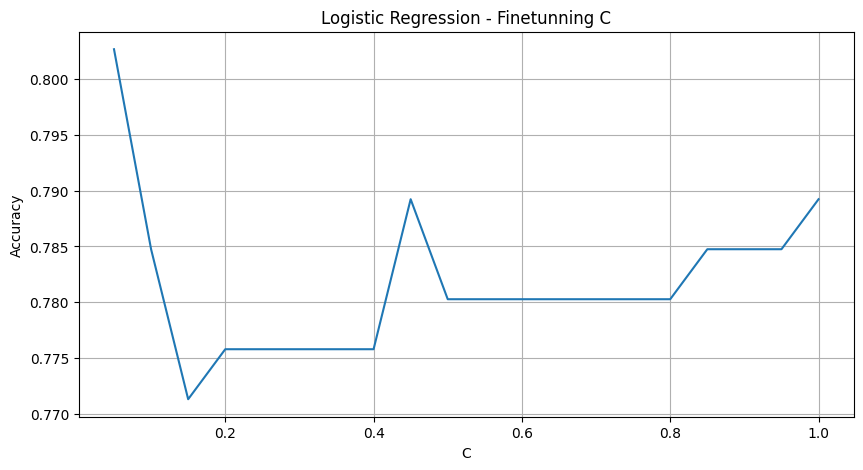

In [75]:
plt.figure(figsize=(10,5))
plt.title('Logistic Regression - Finetunning C')
plt.plot(C_val, scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## K-NearestNeighbors

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7847533632286996

### Save and Load Model

In [77]:
#SaveModel
import pickle
with open('knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [78]:
#LoadModel
with open('knn.pkl', 'rb') as f:
    model_knn = pickle.load(f)

y_pred = model_knn.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7847533632286996

### Finetunning KNN using various k value

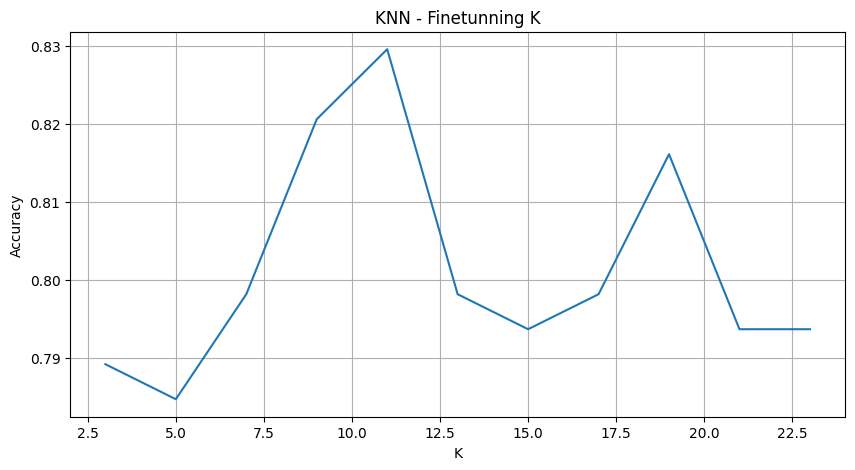

In [79]:
scores = []
Ks = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
for k in Ks:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('KNN - Finetunning K')
plt.plot(Ks, scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Finetunning KNN using various k value

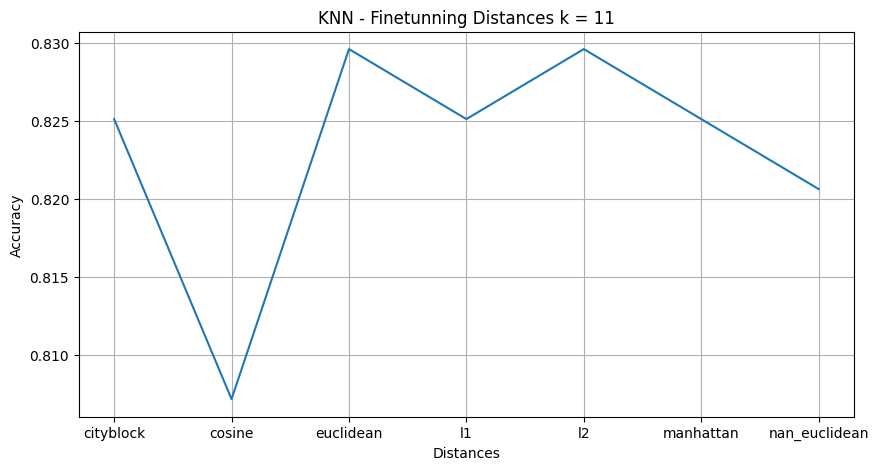

In [80]:
scores = []
distances = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
for dist in distances:
    knn_k = KNeighborsClassifier(n_neighbors=11, metric=dist)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('KNN - Finetunning Distances k = 11')
plt.plot(distances, scores)
plt.xlabel('Distances')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [81]:
scores

[0.8251121076233184,
 0.8071748878923767,
 0.8295964125560538,
 0.8251121076233184,
 0.8295964125560538,
 0.8251121076233184,
 0.820627802690583]

## Cross Validation

In [82]:
kf = KFold(n_splits=4, random_state=213, shuffle=True)

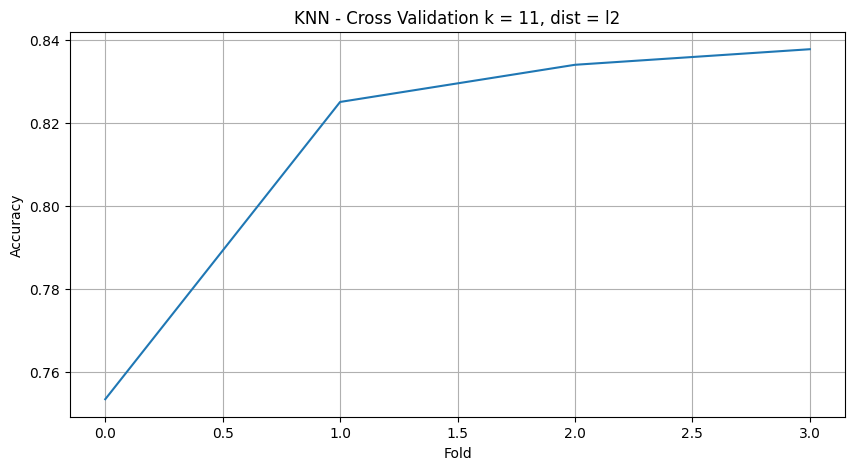

In [83]:
scores = []
fold = []
for idx, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_tr = X_train.to_numpy()[train_idx, :]
    X_tt = X_train.to_numpy()[test_idx, :]
    y_tr = y_train[train_idx]
    y_tt = y_train[test_idx]
    
#Modeling
    knn_k = KNeighborsClassifier(n_neighbors=11, metric='l2')
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)
    fold.append(idx)

plt.figure(figsize=(10,5))
plt.title('KNN - Cross Validation k = 11, dist = l2')
plt.plot(fold, scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## MLP Classifier

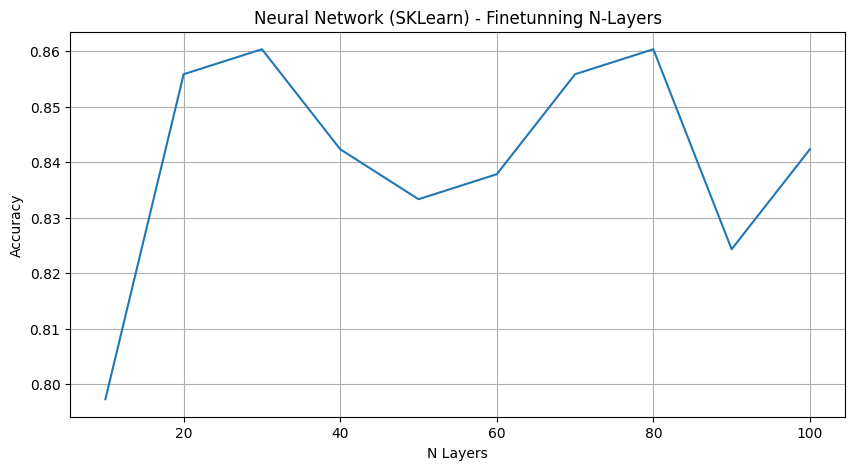

In [84]:
layers = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores = []
for layer in layers:
    mlp = MLPClassifier (verbose=False, random_state=123, hidden_layer_sizes=layer, max_iter=1000)
    mlp.fit(X_tr, y_tr)
    y_pred = mlp.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('Neural Network (SKLearn) - Finetunning N-Layers')
plt.plot(layers, scores)
plt.xlabel('N Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## NN with TensorFlow

In [85]:
import tensorflow as tf #collect tensorflow library

In [86]:
#tensorflow testing using mnist dataset
mnist = tf.keras.datasets.fashion_mnist

(X_m_tr, y_m_tr), (X_m_tt, y_m_tt) = mnist.load_data()

In [87]:
print(X_m_tr.shape, X_m_tt.shape, y_m_tr.shape, y_m_tt.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


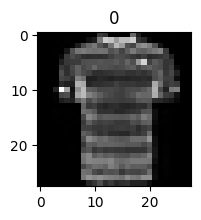

In [88]:
idx = 35
plt.figure(figsize=(2,2))
plt.imshow(X_m_tt[idx,:,:], cmap='grey')
plt.title(y_m_tt[idx])
plt.show()

## Continue to use titanic datasets on NN

In [89]:
# flatten berfungsi membuat df 2D menjadi vektor, misal input shape pada gambar yang awalnya 1024x1024 akan dikompres menjadi 28x28
# dense (regular densely-connected NN layer), bentuknya vektor
# Dropout akan menghilangkan weight sebanyak nilai yang diinputkan
# dense terakhir disesuaikan dengan class pada data yang digunakan

In [90]:
epoch=200
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(6,)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    #tf.keras.layers.Dense(1, activation='softmax')
    ])

model6.summary()

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=50, restore_best_weights=True)

model6.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

history = model6.fit(X_tr, y_tr, epochs=epoch, validation_data=(X_tt, y_tt), callbacks=[es])
#model.evaluate(X_tt, y_tt, verbose=2)


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4176 - loss: 0.7215 - val_accuracy: 0.4550 - val_loss: 0.7108
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4162 - loss: 0.7091 - val_accuracy: 0.4730 - val_loss: 0.7002
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4670 - loss: 0.6949 - val_accuracy: 0.4910 - val_loss: 0.6924
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5509 - loss: 0.6842 - val_accuracy: 0.6171 - val_loss: 0.6864
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6322 - loss: 0.6835 - val_accuracy: 0.5901 - val_loss: 0.6819
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6182 - loss: 0.6759 - val_accuracy: 0.6081 - val_loss: 0.6784
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6325 - loss: 0.6722 - val_accuracy: 0.6126 - val_loss: 0.6755
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6381 - loss: 0.6681 - val_accuracy: 0.6126 - 

In [91]:
result = history.history #saving the result using history.history, assign in result variable
n_epochs = np.arange(0,len(result['accuracy']))

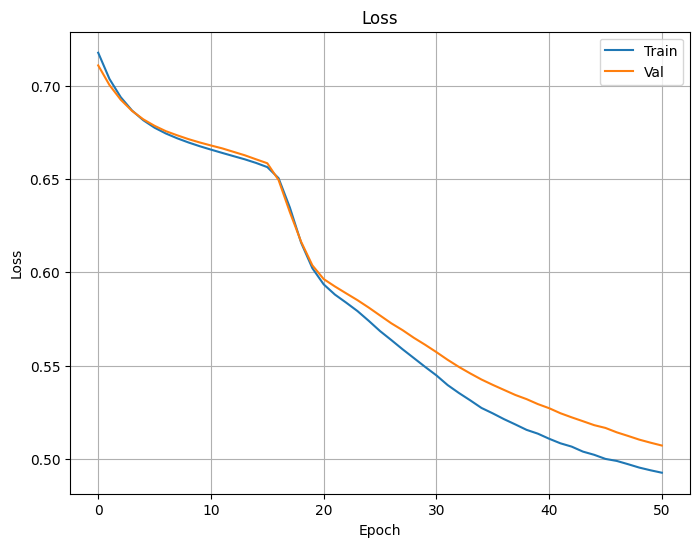

In [92]:
#visualizing the correlation of loss and epochs
plt.figure(figsize=(8,6))
plt.title('Loss')
plt.plot(n_epochs, result['loss'])
plt.plot(n_epochs, result['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

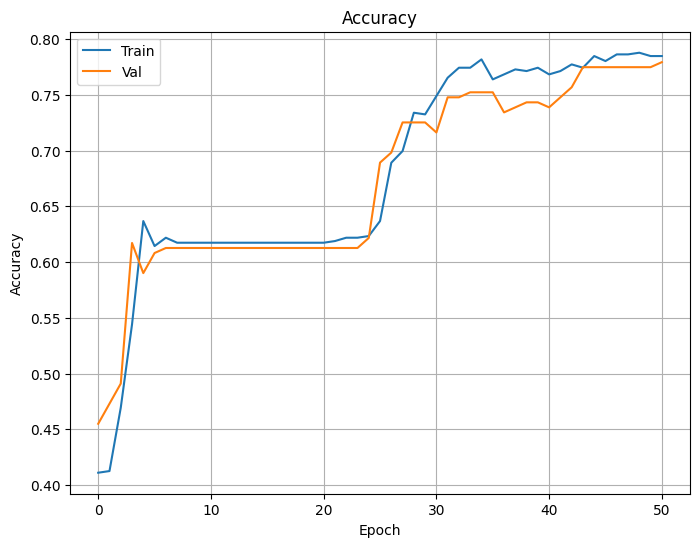

In [93]:
#visualizing the correlation of accuracy and epochs
plt.figure(figsize=(8,6))
plt.title('Accuracy')
plt.plot(n_epochs, result['accuracy'])
plt.plot(n_epochs, result['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

### Model Save

In [94]:
model6.save('Model6.keras') #save keras model using model.save in keras' library

In [95]:
model = tf.keras.models.load_model('Model6.keras')
model.summary() #showing model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (688.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [96]:
model.evaluate(X_tt, y_tt) #evaluate the model, generate accuracy and loss value

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4713 - loss: 0.7077  


[0.7107807993888855, 0.45495495200157166]

In [97]:
y_pred = model.predict(X_tt) #predict the model using model.predict()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [98]:
#Tresholding logits output
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [99]:
score = accuracy_score(y_tt, y_pred)

In [100]:
score

0.45495495495495497

## Support Vector Machine

In [101]:
SVC

sklearn.svm._classes.SVC

In [102]:
from sklearn.preprocessing import StandardScaler
stdscl = StandardScaler()
stdscl.fit(X_tr)
X_tr_std = stdscl.transform(X_tr)

In [103]:
print(X_tr[0])
print(X_tr_std[0])

[3 0 1 0 2 1]
[ 0.79435842 -0.72862367 -0.32733905 -0.57723648 -0.49846116  1.6998632 ]


In [104]:
svc = SVC()
svc.fit(X_tr, y_tr)
y_pred = svc.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.8063063063063063

### SVC Finetunning

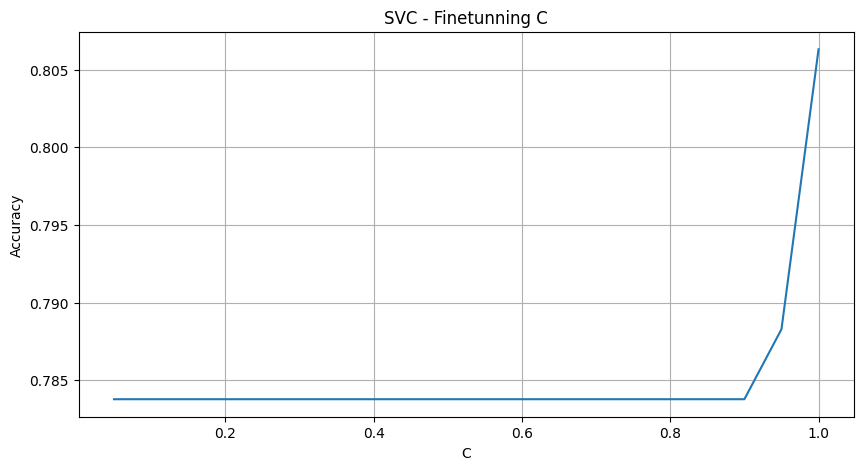

In [105]:
scores = []
C_val = np.linspace(0.05, 1.0, 20)
for c in C_val: #using for loop function to predict with various C assigned in C_val
    svc_c = SVC(C=c)
    svc_c.fit(X_tr, y_tr)
    y_pred = svc_c.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)
    scores

plt.figure(figsize=(10,5))
plt.title('SVC - Finetunning C')
plt.plot(C_val, scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


## Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [111]:
mnb = MultinomialNB()
mnb.fit(X_tr, y_tr)
y_pred = mnb.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7927927927927928